# I-Business Understanding:
***
## 1-Overview:
Coupon systems have been widely used to market products, and services and engage customers to use their products and services often. Coupons create a win-win situation for both companies and customers so, by offering a correct coupon to users, which can lead users to become frequent customers and it is enhancing a brand’s impact on its customers.

How to know which coupon to provide a customer can be a rather complex task, since each customer profile responds differently to each other, and frequently offering them bad coupons or deals might drag them away from your business. To overcome this problem, machine learning techniques can be used to build a better coupon recommendations system.
## 2-Business Objective:
Predicting whether the customer will accept the coupon or not is a difficult problem, and we can not just recommend it to everyone because of the costs concerned so, in this problem, we will predict whether a customer will accept or reject the offered coupon based on the customer’s profile and history.

This prediction helps the company in offering a correct coupon so that more customers will use their services which leads to more business for the company.

## 3-DS Objective:
The goal of the prediction problem is to predict whether a customer will accept or reject the coupon for a specific venue based on demographic and contextual attributes. If the customers accept the coupon are labeled as Y=1 and if the customers reject the coupon are labeled as Y=0. This problem can be posed as a binary class classification problem.
# II-Data Understanding:
***
## 1-Importing Libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

## 2-Loading Data:

In [ ]:
df = pd.read_csv("/content/in-vehicle-coupon-recommendation.csv")

## 3-Explanation of Dataset attributes/features:
### 3.1-User attributes:
>__1. Gender:__ Female, Male<br>
>__2. Age:__ 21, 46, 26, 31, 41, 50plus, 36, below21<br>
>__3. Marital Status:__ Unmarried partner, Single, Married partner, Divorced, Widowed<br>
>__4. has_Children:__ 1: has children, 0: No children<br>
>__5. Education:__ Some college — no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School<br>
>__6. Occupation:__ unique 25 number of occupation of users (Unemployed, Architecture & Engineering, Student,Education&Training&Library, Healthcare Support,Healthcare Practitioners & Technical, Sales & Related, Management,Arts Design Entertainment Sports & Media, Computer & Mathematical,Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry)<br>
>__7. Income:__ income of user (Less than \\\$12500, \\\$12500 — \\\$24999, \\\$25000 — \\\$37499, \\\$37500 — \\\$49999, \\\$50000 — \\\$62499, \\\$62500 — \\\$74999, \\\$75000 — \\\$87499, \\\$87500 — \\\$99999, \\\$100000 or More)<br>
>__8. Car :__ Description of vehicle which driven by user (Scooter and motorcycle, crossover, Mazda5) (99% of values are missing in this feature)<br>
>__9. Bar:__ how many times does the user go to a bar every month? (never, less1, 1\~3, 4\~8, gt8, nan)<br>
>__10. CoffeeHouse:__ how many times does the user go to a coffeehouse every month? (never, less1, 1\~3, 4\~8, gt8, nan)<br>
>__11. CarryAway:__ how many times does the user get take-away food every month? (never, less1, 1\~3, 4\~8, gt8, nan)<br>
>__12. RestaurantLessThan20:__ how many times does the user go to a restaurant with an average expense per person of less than \\\$20 every month? (never, less1, 1\~3, 4\~8, gt8, nan)<br>
>__13. Restaurant20To50:__ how many times does the user go to a restaurant with average expense per person of \\\$20 — \\\$50 every month? (never, less1, 1\~3, 4\~8, gt8, nan)<br>
### 3.2-Contextual attributes:
>__1. Destination:__ destination of user (No Urgent Place, Home, Work)<br>
>__2. Passenger:__ who are the passengers in the car (Alone, Friend(s), Kid(s), Partner)<br>
>__3. Weather:__ weather when user is driving (Sunny, Rainy, Snowy)<br>
>__5. Time:__ time when user driving (2PM, 10AM, 6PM, 7AM, 10PM)<br>
>__6. toCoupon_GEQ5min:__ driving distance to the restaurant/cafe/bar for using the coupon is greater than 5 minutes (0,1)<br>
>__7. toCoupon_GEQ15min:__ driving distance to the restaurant/cafe/bar for using the coupon is greater than 15 minutes (0,1)<br>
>__8. toCoupon_GEQ25min:__ driving distance to the restaurant/cafe/bar for using the coupon is greater than 25 minutes (0,1)<br>
>__9. direction_same:__ whether the restaurant/cafe/bar is in the same direction as user’s current destination (0,1)<br>
>__10. direction_opp:__ whether the restaurant/cafe/bar is in the opposite direction as user’s current destination (0,1)<br>
### 3.3-Coupon attributes:
>__1. Coupon:__ coupon type offered by company (Restaurant(<\\\$20), Coffee House, Carry out & Take away, Bar, Restaurant(\\\$20-\\\$50)). Here, <\\\$20 is the average pay per user in a not too expensive restaurant, Restaurant(\\\$20-\\\$50) means the average pay per user is between \\\$20 to \\\$50 which little bit expensive restaurant.<br>
>__2. Expiration:__ coupon expires in 1 day or in 2 hours (1d, 2h)<br>
### 3.4-Target attribute:
>__1. Y:__ whether the coupon is accepted or rejected, 1:accepted, 0:rejected

# III-Data Preparation
***
## 1- Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

We can see that most features are categorical and a few are numeric categorical types. Some features have null values, so need to check for the missing value in attributes.

## 2-Remove duplicates
***

In [ ]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(12684, 26)
(12610, 26)


## 3-Dealing with Missing values
***

In [ ]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [ ]:
missing_percentage(df)

,Total,Percent
car,12502,99.14
CoffeeHouse,217,1.72
Restaurant20To50,189,1.50
CarryAway,150,1.19
RestaurantLessThan20,129,1.02
Bar,107,0.85
destination,0,0.00
passanger,0,0.00
direction_opp,0,0.00
direction_same,0,0.00


We can see that the total 6 attributes have missing values, from that 'car' feature has 99% of the missing value so we need to drop this feature.<br>
Other features like 'bar', 'coffeehouse', 'carryaway', 'RestaurantLessThan20', and 'Restaurant20To50' have approx 1% of missing value, so we need to fill these missing values with some other value, for that we will use mode imputation.

In [ ]:
df.drop(['car'], axis=1, inplace=True)

In [ ]:
df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0], inplace=True)
df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0], inplace=True)
df['CarryAway'].fillna(df['CarryAway'].mode()[0], inplace=True)
df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0], inplace=True)
df['Bar'].fillna(df['Bar'].mode()[0], inplace=True)

## 4-Visualization and Feature Relations
***
### 4.1-Correlation of Features

In [ ]:
numeric_categorical_features = df.select_dtypes(include=['int', 'float']).columns
df_numeric_categorical = df[numeric_categorical_features]
df_numeric_categorical.corr()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.018599,NaN,-0.157089,-0.227165,0.097972,-0.097972,0.059393
has_children,-0.018599,1.000000,NaN,0.079434,-0.010773,-0.032353,0.032353,-0.045056
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.157089,0.079434,NaN,1.000000,0.321260,-0.302066,0.302066,-0.082693
toCoupon_GEQ25min,-0.227165,-0.010773,NaN,0.321260,1.000000,-0.189900,0.189900,-0.108139
direction_same,0.097972,-0.032353,NaN,-0.302066,-0.189900,1.000000,-1.000000,0.014932
direction_opp,-0.097972,0.032353,NaN,0.302066,0.189900,-1.000000,1.000000,-0.014932
Y,0.059393,-0.045056,NaN,-0.082693,-0.108139,0.014932,-0.014932,1.000000


1-Feature 'direction_same' is perfectly correlated with 'direction_opp', both have the same variance.<br>
2-'toCoupon_GEQ5min' feature has no correlation with any feature because it has the same value '1' for all data points, which means all the restaurants/bars are at least more than five minutes away from the driver.<br>

so, drop both 'direction_opp' and 'toCoupon_GEQ5min' features.

In [ ]:
df.drop(['direction_opp','toCoupon_GEQ5min'], axis=1, inplace=True)

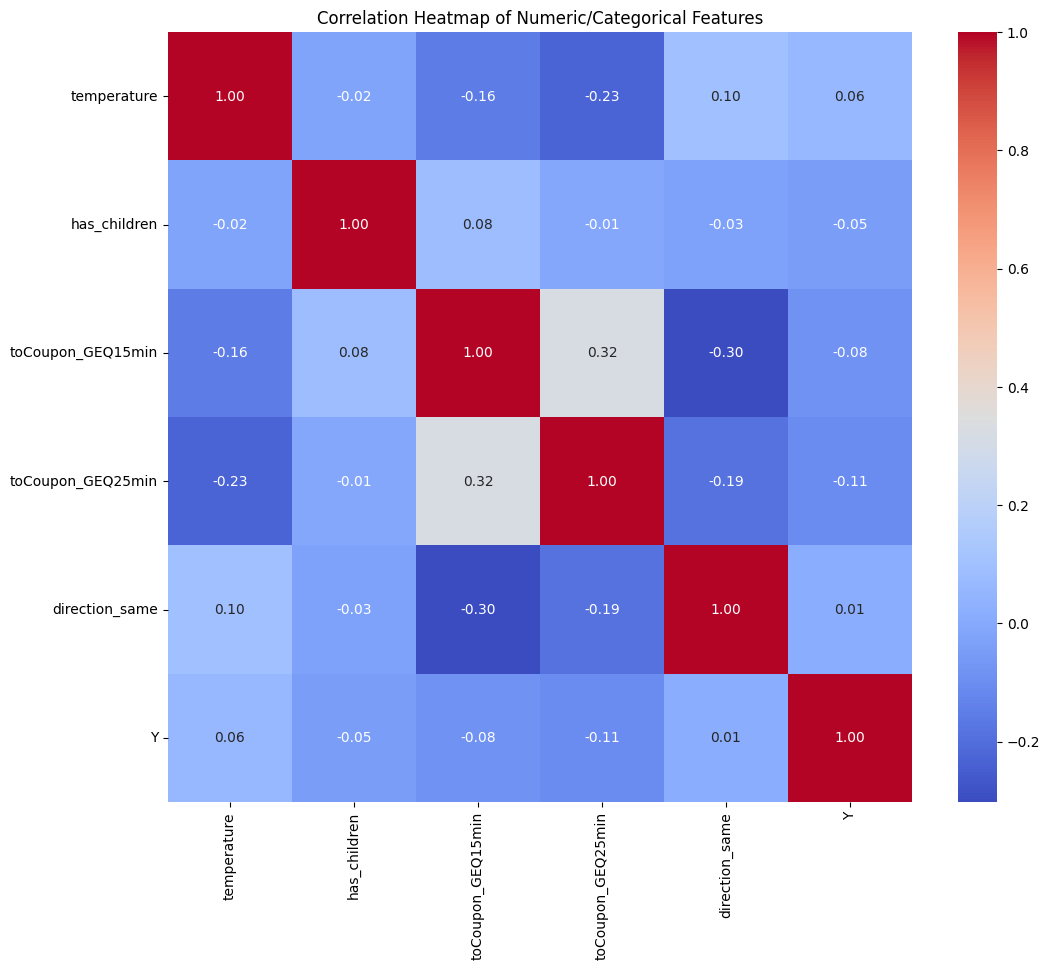

In [ ]:
# correaltion heatmap

# Calculate the correlation matrix
correlation_matrix = df_numeric_categorical.corr()

# Exclude specified columns from the correlation matrix
columns_to_exclude = ['direction_opp', 'toCoupon_GEQ5min']
correlation_matrix = correlation_matrix.drop(columns=columns_to_exclude, index=columns_to_exclude)

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric/Categorical Features')
plt.show()

### 4.2-Univariate Analysis

#### A-direction_same

In [ ]:
def percent_value_counts(df, feature):
    data = pd.DataFrame(sorted(list(df[feature].unique())),columns=[feature])
    data['Total_Count'] = list(df.groupby(feature).Y.count())
    data['Total_%'] = round(data['Total_Count']/df[feature].shape[0]*100,3)
    data['Accepted'] = list(df[df.Y==1].groupby(feature).Y.count())
    data['Rejected'] = list(df[df.Y==0].groupby(feature).Y.count())
    data['%Accepted'] = round(data['Accepted']/data['Total_Count']*100,3)
    data['%Rejected'] = round(data['Rejected']/data['Total_Count']*100,3)
    return data

In [ ]:
def univariate_analysis(df, feature):
    df_EDA = percent_value_counts(df, feature)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)

    fig = plt.subplots(figsize =(8, 4))
    plt.barh(df_EDA[feature],df_EDA['Total_Count'])
    plt.barh(df_EDA[feature],df_EDA['Accepted'])
    plt.legend(labels=['Total','Accepted'])
    plt.xlabel('Counts')
    plt.title(feature+' wise accepted coupons')
    plt.show()
    return df_EDA

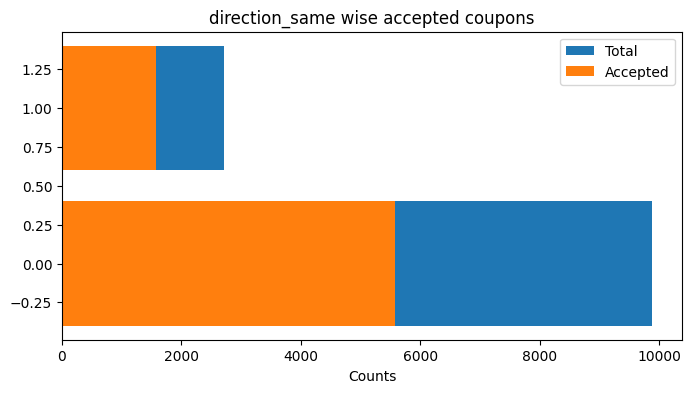

,direction_same,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
0,0,9892,78.446,5576,4316,56.369,43.631
1,1,2718,21.554,1581,1137,58.168,41.832


In [ ]:
univariate_analysis(df,'direction_same')

**Observations:**

direction_same feature has 78% value is '0', and 22% value is '1'. Both value has almost similar acceptance ratio. so this feature not more usefull. So, we drop 'direction_same' feature.

In [ ]:
df.drop(['direction_same'], axis=1, inplace=True)

#### B-coupon

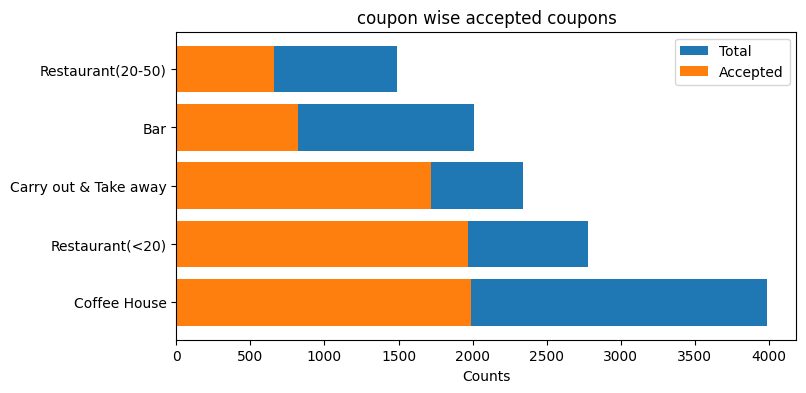

,coupon,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
2,Coffee House,3989,31.634,1989,2000,49.862,50.138
4,Restaurant(<20),2779,22.038,1967,812,70.781,29.219
1,Carry out & Take away,2344,18.588,1720,624,73.379,26.621
0,Bar,2010,15.940,824,1186,40.995,59.005
3,Restaurant(20-50),1488,11.800,657,831,44.153,55.847


In [ ]:
univariate_analysis(df,'coupon')

**Observations:**
- Maximum coupons offered are for Coffee House coupons.
- Maximum coupons accepted by users are Carry out & Take away and Restaurant(<20) coupons.
- Bar coupon has a very low acceptance ratio.

#### C- age

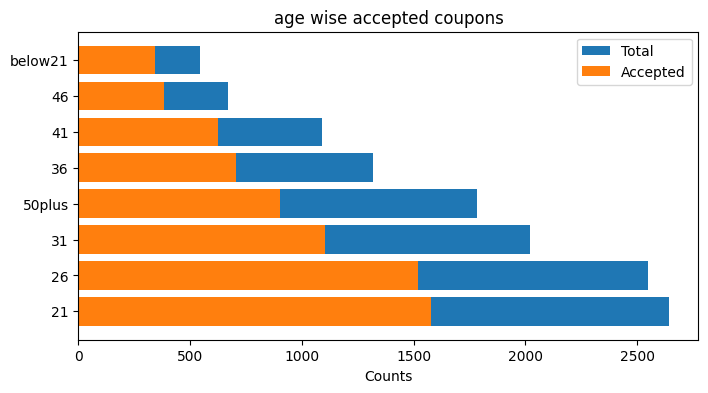

,age,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
0,21,2642,20.952,1579,1063,59.765,40.235
1,26,2548,20.206,1517,1031,59.537,40.463
2,31,2019,16.011,1102,917,54.581,45.419
6,50plus,1781,14.124,903,878,50.702,49.298
3,36,1317,10.444,705,612,53.531,46.469
4,41,1089,8.636,623,466,57.208,42.792
5,46,670,5.313,384,286,57.313,42.687
7,below21,544,4.314,344,200,63.235,36.765


In [ ]:
univariate_analysis(df,'age')

**Observations:**
- Most users in this data have ages between 21 to 26 years.
- The users whose age is below 21 years have the highest coupon acceptance ratio.
- The users whose age is above 50 years have the highest coupon rejection ratio.

#### D- education

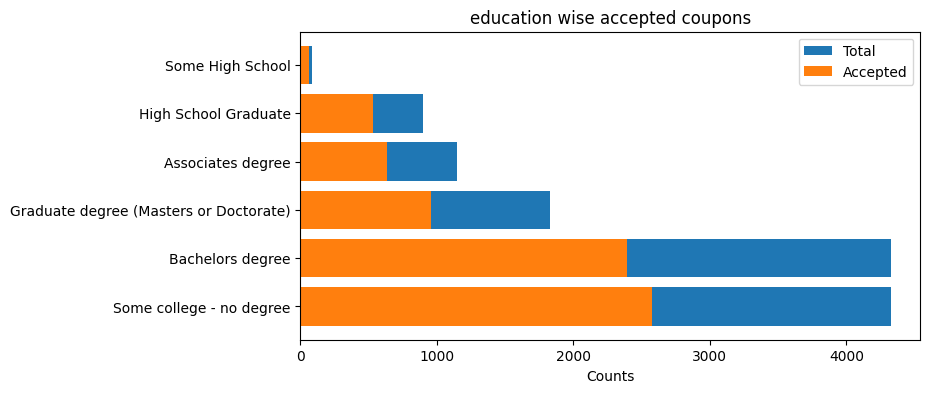

,education,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
5,Some college - no degree,4325,34.298,2577,1748,59.584,40.416
1,Bachelors degree,4323,34.282,2395,1928,55.401,44.599
2,Graduate degree (Masters or Doctorate),1827,14.489,956,871,52.326,47.674
0,Associates degree,1148,9.104,634,514,55.226,44.774
3,High School Graduate,899,7.129,532,367,59.177,40.823
4,Some High School,88,0.698,63,25,71.591,28.409


In [ ]:
univariate_analysis(df,'education')

**Observations:**
- Most users have at least a Bachelor's degree or Some college - no degree.
- In this data, very few users have only Some High School education, and those users have the highest coupon acceptance ratio.
- Users who have a Graduate degree (Masters or Doctorate) have the least coupon acceptance ratio.

#### E- income

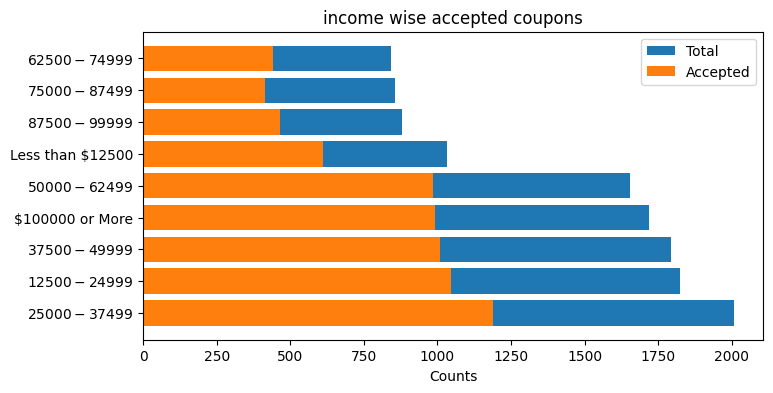

,income,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
2,$25000 - $37499,2006,15.908,1190,816,59.322,40.678
1,$12500 - $24999,1825,14.473,1047,778,57.370,42.630
3,$37500 - $49999,1795,14.235,1010,785,56.267,43.733
0,$100000 or More,1717,13.616,992,725,57.775,42.225
4,$50000 - $62499,1655,13.125,984,671,59.456,40.544
8,Less than $12500,1034,8.200,612,422,59.188,40.812
7,$87500 - $99999,879,6.971,465,414,52.901,47.099
6,$75000 - $87499,856,6.788,414,442,48.364,51.636
5,$62500 - $74999,843,6.685,443,400,52.550,47.450


In [ ]:
univariate_analysis(df,'income')

**Observations:**
- Most users in this data have income in between \\\$12500 and \\\$49999
- Users who have low income and high income accept more coupons than others.
- Users who have medium-range income are mostly rejecting the coupon.

#### F- destination

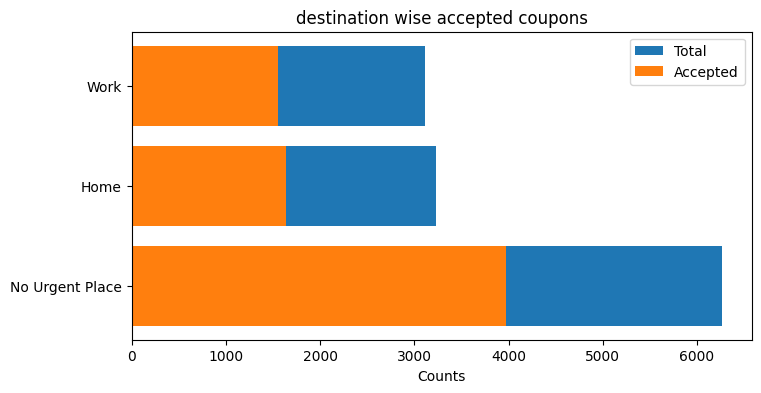

,destination,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
1,No Urgent Place,6266,49.691,3969,2297,63.342,36.658
0,Home,3230,25.615,1635,1595,50.619,49.381
2,Work,3114,24.695,1553,1561,49.872,50.128


In [ ]:
univariate_analysis(df,'destination')

**Observations:**
- Most of the users go to No Urgent Place.
- The users who have destination No Urgent Place are accepting more coupons than others.
- The users who have destination Home and Work have almost similar coupon acceptance ratios.

#### G- passanger

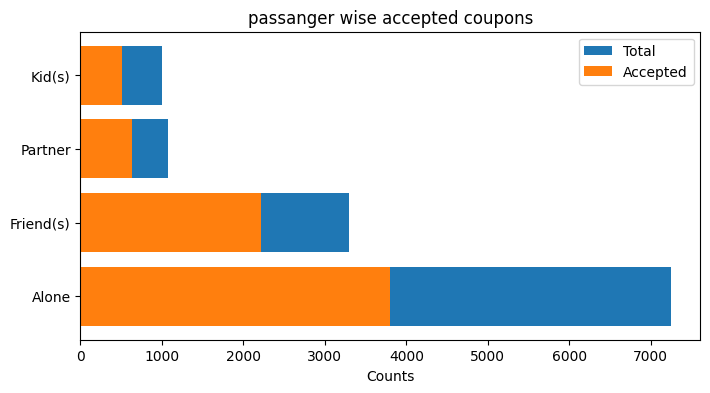

,passanger,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
0,Alone,7248,57.478,3801,3447,52.442,47.558
1,Friend(s),3292,26.106,2216,1076,67.315,32.685
3,Partner,1069,8.477,635,434,59.401,40.599
2,Kid(s),1001,7.938,505,496,50.450,49.550


In [ ]:
univariate_analysis(df,'passanger')


**Observations:**
- Most of the time users go out Alone.
- The users who go out with Friends or Partner have more coupon acceptance ratios than Alone users.
- The users who go out with Friends are accepting more coupons than other co-passengers.

#### H- weather

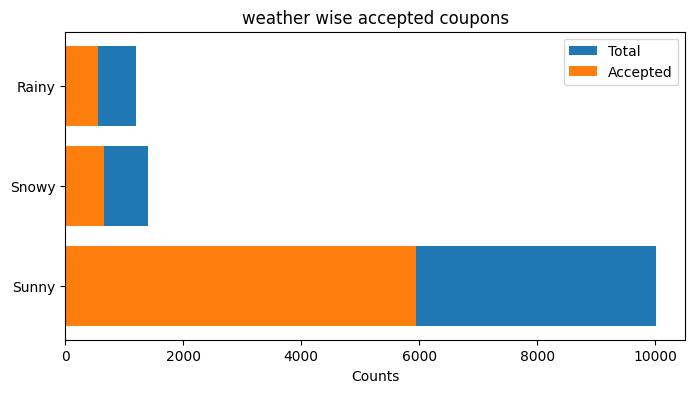

,weather,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
2,Sunny,10011,79.389,5941,4070,59.345,40.655
1,Snowy,1397,11.079,659,738,47.173,52.827
0,Rainy,1202,9.532,557,645,46.339,53.661


In [ ]:
univariate_analysis(df,'weather')

**Observations:**
- In Sunny weather, users go out more and accept more coupons than other wethers.

#### I- temperature

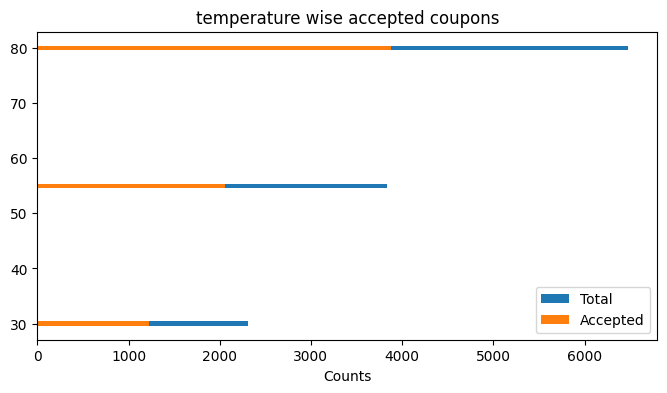

,temperature,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
2,80,6475,51.348,3876,2599,59.861,40.139
1,55,3830,30.373,2056,1774,53.681,46.319
0,30,2305,18.279,1225,1080,53.145,46.855


In [ ]:
univariate_analysis(df,'temperature')

**Observations:**
- Most of the time users go out when the temperature is 80 F.
- When the temperature is 80 F, user's coupon acceptance ratio is approx 59.86%.rs.

#### J- time

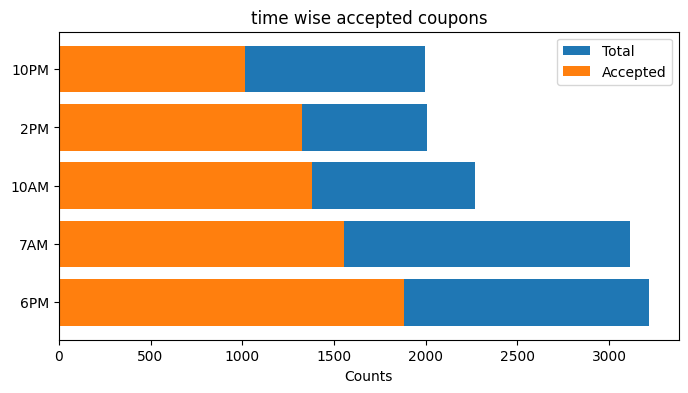

,time,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
3,6PM,3220,25.535,1881,1339,58.416,41.584
4,7AM,3114,24.695,1553,1561,49.872,50.128
0,10AM,2271,18.010,1380,891,60.766,39.234
2,2PM,2006,15.908,1327,679,66.152,33.848
1,10PM,1999,15.852,1016,983,50.825,49.175


In [ ]:
univariate_analysis(df,'time')

**Observations:**
- Most of the time users go out when the time is 6 PM and 7 AM.
- The users mostly accept coupons when the time is 2 PM and 10 AM.

#### K- gender

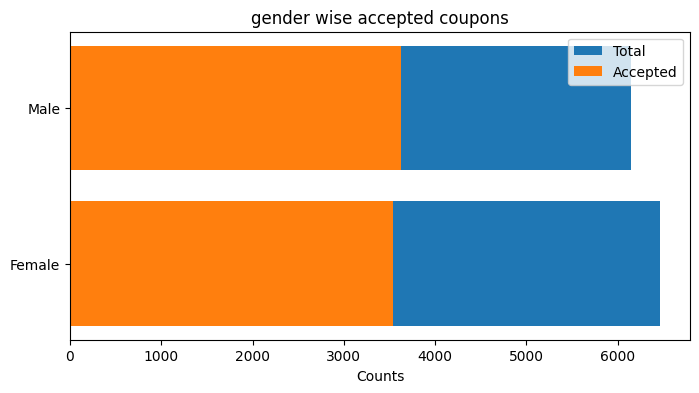

,gender,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
0,Female,6469,51.301,3535,2934,54.645,45.355
1,Male,6141,48.699,3622,2519,58.981,41.019


In [ ]:
univariate_analysis(df,'gender')


**Observations:**
- Male and Female both have almost similar coupon acceptance ratios.

**Observations:**
- Most users in this data have ages between 21 to 26 years.
- The users whose age is below 21 years have the highest coupon acceptance ratio.
- The users whose age is above 50 years have the highest coupon rejection ratio.

#### L- maritalStatus

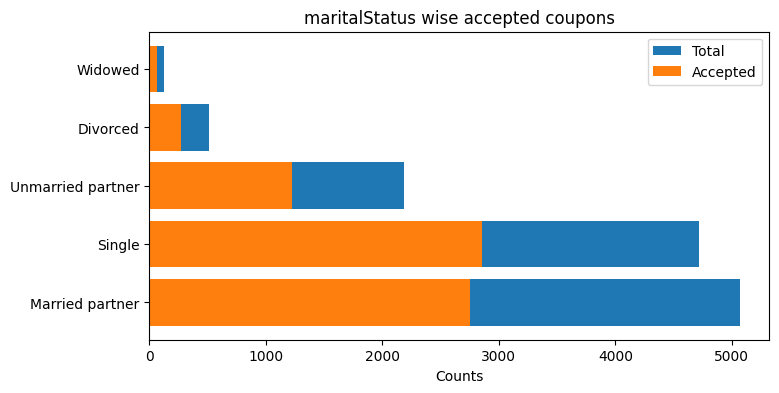

,maritalStatus,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
1,Married partner,5068,40.190,2749,2319,54.242,45.758
2,Single,4716,37.399,2851,1865,60.454,39.546
3,Unmarried partner,2185,17.328,1226,959,56.110,43.890
0,Divorced,511,4.052,269,242,52.642,47.358
4,Widowed,130,1.031,62,68,47.692,52.308


In [ ]:
univariate_analysis(df,'maritalStatus')

**Observations:**
- Most users in this data are Single or have Married partner.
- Single users accept more coupons than others.

### 4.3-Bivariate Analysis

#### Q - What time do users go to Work, Home, or No Urgent Place, and with whom?

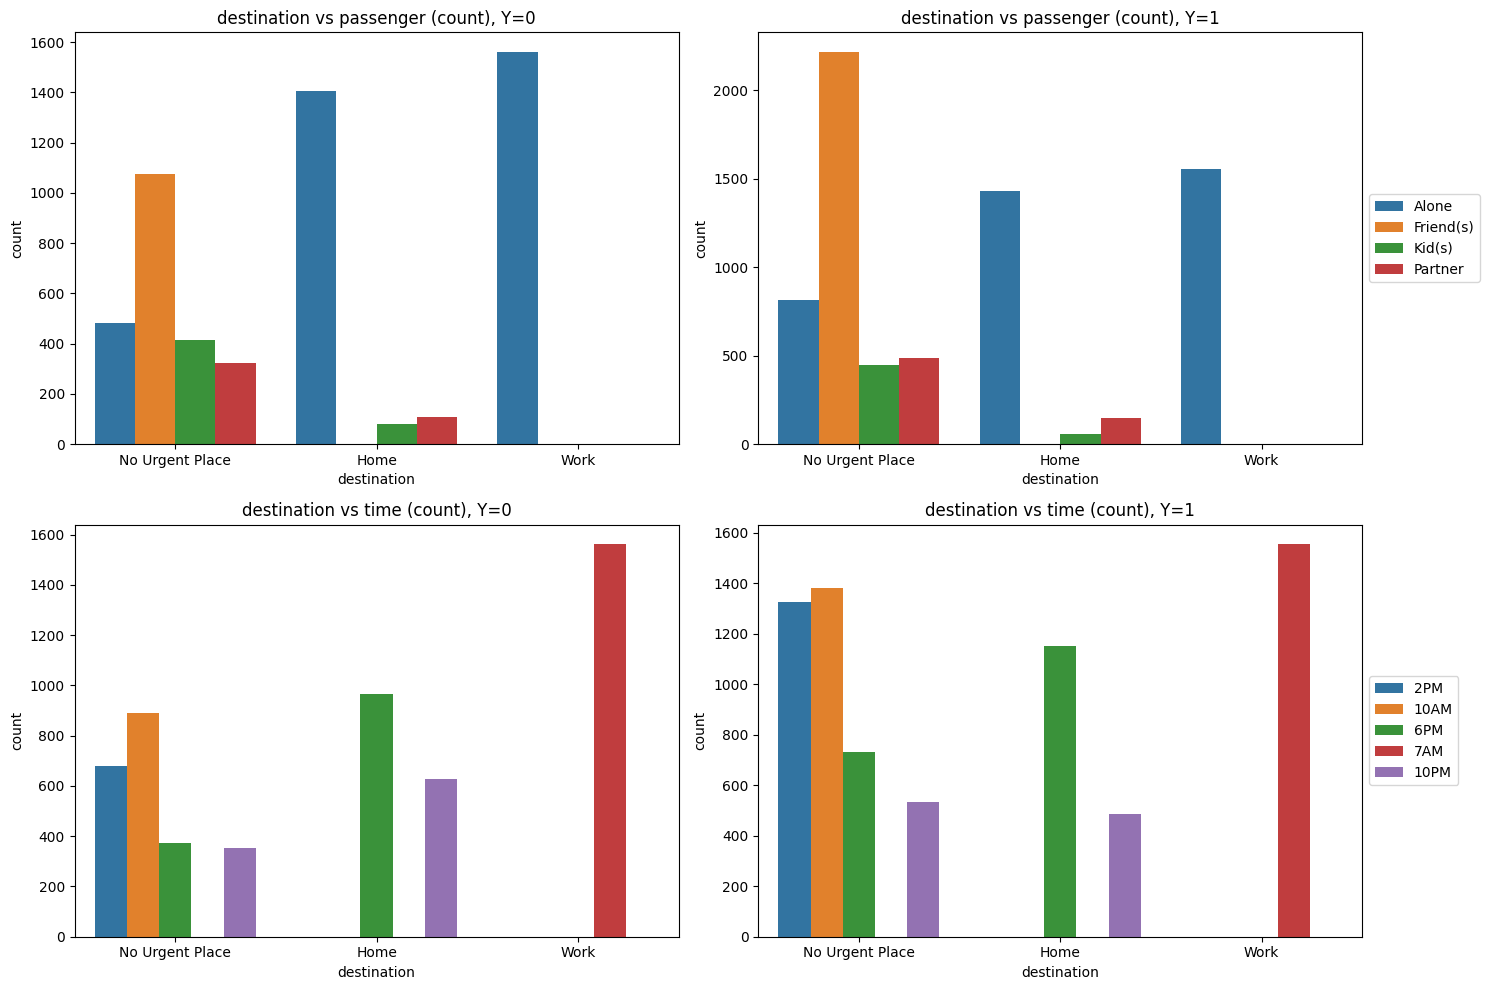

In [ ]:
# Define the order of unique values for each variable
destination_order = df['destination'].unique()
passenger_order = df['passanger'].unique()
time_order = df['time'].unique()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for 'destination' vs 'passenger', Y=0
sns.countplot(x='destination', hue='passanger', data=df[df['Y'] == 0], ax=axes[0, 0], order=destination_order, hue_order=passenger_order)
axes[0, 0].set_title('destination vs passenger (count), Y=0')
axes[0, 0].legend().remove()


# Plot for 'destination' vs 'passenger', Y=1
sns.countplot(x='destination', hue='passanger', data=df[df['Y'] == 1], ax=axes[0, 1], order=destination_order, hue_order=passenger_order)
axes[0, 1].set_title('destination vs passenger (count), Y=1')

# Set legend on the right
axes[0, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plot for 'destination' vs 'time', Y=0
sns.countplot(x='destination', hue='time', data=df[df['Y'] == 0], ax=axes[1, 0], order=destination_order, hue_order=time_order)
axes[1, 0].set_title('destination vs time (count), Y=0')
axes[1, 0].legend().remove()


# Plot for 'destination' vs 'time', Y=1
sns.countplot(x='destination', hue='time', data=df[df['Y'] == 1], ax=axes[1, 1], order=destination_order, hue_order=time_order)
axes[1, 1].set_title('destination vs time (count), Y=1')

# Set legend on the right
axes[1, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

**Observations:**
- The users who go with Friends have only No Urgent Place destination.
- Maximum users accept coupons when the time is 2 PM and 10 AM, the destination is No Urgent Place, and the co-passanger is Friends.
- The users who have destination Home and Work have almost similar coupon acceptance ratios.

#### Q - At what time, which coupon acceptance ratio is high?

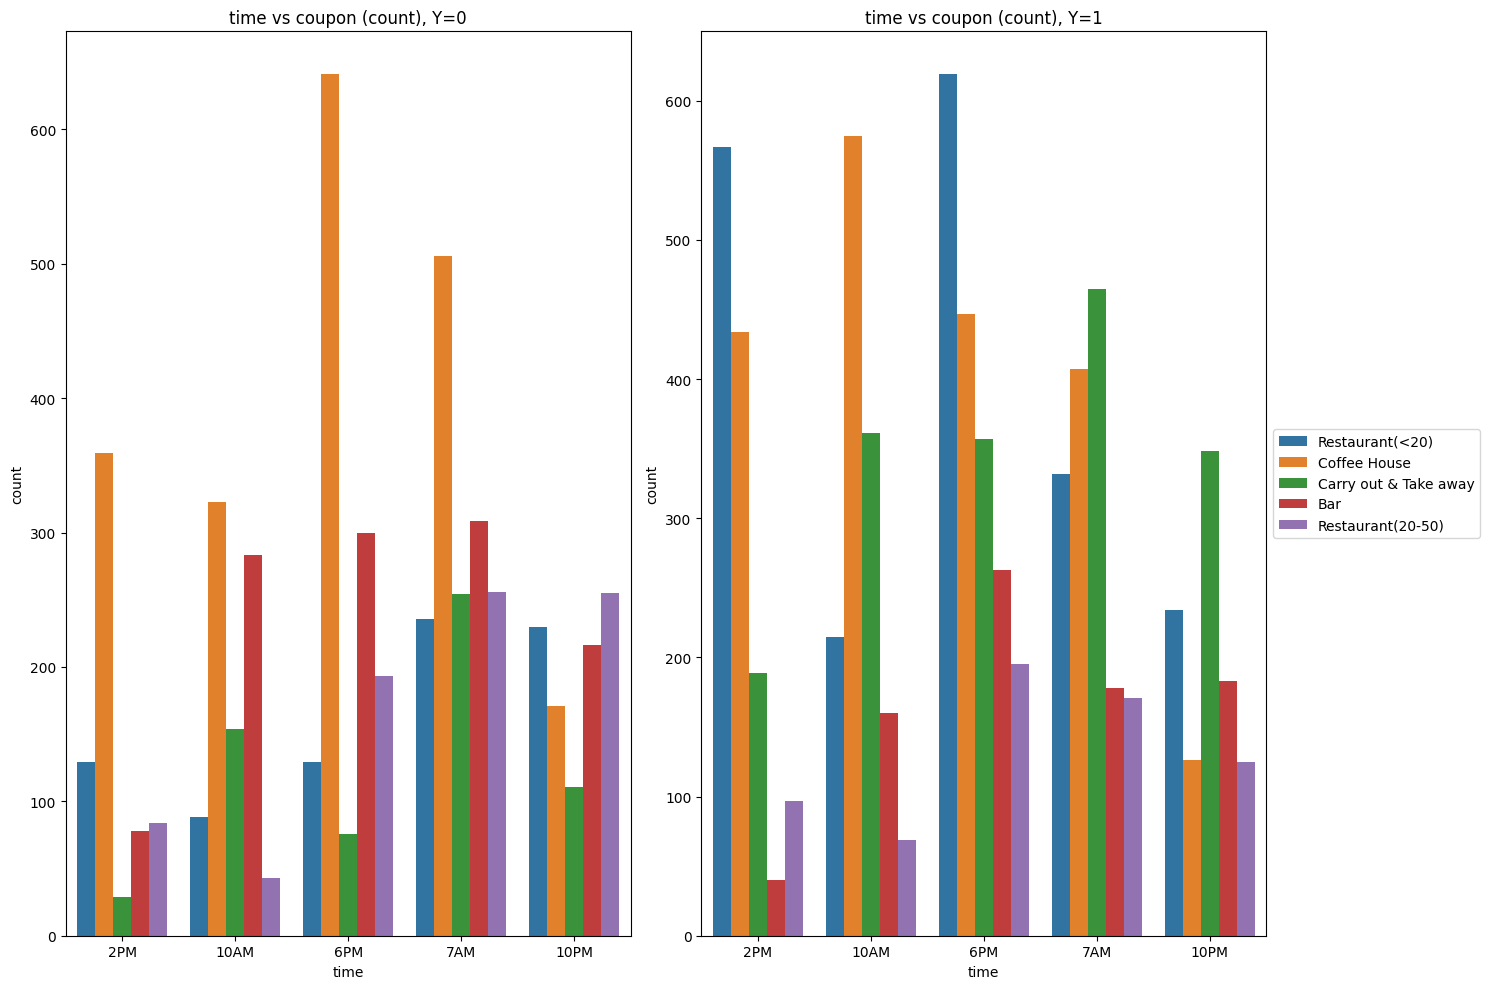

In [ ]:
# Define the order of unique values for each variable
coupon_order = df['coupon'].unique()
time_order = df['time'].unique()

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot for 'destination' vs 'passenger', Y=0
sns.countplot(x='time', hue='coupon', data=df[df['Y'] == 0], ax=axes[0], order=time_order, hue_order=coupon_order)
axes[0].set_title('time vs coupon (count), Y=0')
axes[0].legend().remove()


# Plot for 'destination' vs 'passenger', Y=1
sns.countplot(x='time', hue='coupon', data=df[df['Y'] == 1], ax=axes[1], order=time_order, hue_order=coupon_order)
axes[1].set_title('time vs coupon (count), Y=1')

# Set legend on the right
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


fig.tight_layout()
plt.show()

**Observations:**
- At 10AM, 2 PM and 6 PM, users mostly accept Restaurant(<20), Carry out and coffee house coupons.
- At 7 AM, 10AM, 2PM and 6 PM, Coffee House coupon ask is maximum.
- At 10 PM, mostly Carry out & Take away and Restaurant(<20) coupons are accepted, and Restaurant(20–50) coupons are rejected.
- Users mostly reject coupons for Bar at 7 AM, 10 AM, and 2 PM.

### 4.4-Feature Engineering
#### to_Coupon
‘toCoupon_GEQ15min’ and ‘toCoupon_GEQ25min’ features tell the driving distance to the restaurant/coffee house/bar, so we can combine them and make a new feature called ‘to_coupon’.

‘toCoupon_GEQ15min’ and ‘toCoupon_GEQ25min’ features have two categorical values 0 & 1 and ‘to_coupon’ has three categorical value 0,1 & 2.
> 0: driving distance is less than or equal to 15 min<br>
> 1: driving distance is greater than 15 min and less than or equal to 25 min<br>
> 2: driving distance is greater than 25 min<br>

In [ ]:
df['to_Coupon'] = 2
df.loc[df['toCoupon_GEQ15min'] == 0, 'to_Coupon'] = 0
df.loc[(df['toCoupon_GEQ15min'] == 1) & (df['toCoupon_GEQ25min'] == 0), 'to_Coupon'] = 1

print('Unique values:', df['to_Coupon'].unique())
print('-' * 50)

print(df['to_Coupon'].describe())

Unique values: [0 1 2]
--------------------------------------------------
count    12610.000000
mean         0.675813
std          0.671687
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: to_Coupon, dtype: float64


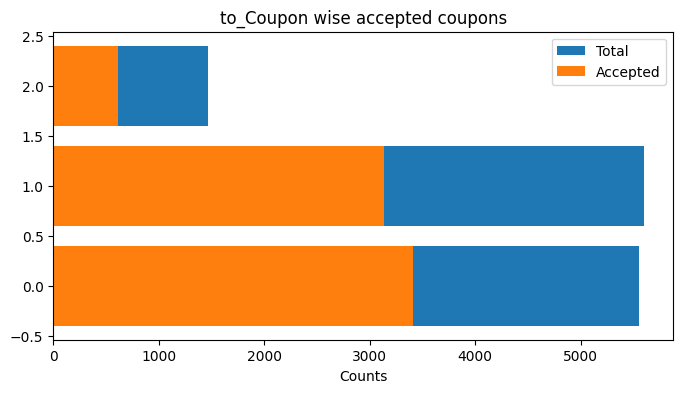

,to_Coupon,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
1,1,5596,44.377,3136,2460,56.040,43.960
0,0,5551,44.021,3407,2144,61.376,38.624
2,2,1463,11.602,614,849,41.969,58.031


In [ ]:
univariate_analysis(df,'to_Coupon')

We can see that most coupons offered are nearby within 25 minutes. Also, users generally accept coupons that are less than 25 minutes distance.

In [ ]:
df.drop(['toCoupon_GEQ15min','toCoupon_GEQ25min'], axis=1, inplace=True)

#### coupon_freq

‘coupon_freq’ is a combination of five features, RestaurantLessThan20, CoffeeHouse, CarryAway, Bar, and Restaurant20To50. These five features tell how frequently a user is going to RestaurantLessThan20, CoffeeHouse, CarryAway, Bar, and Restaurant20To50.

Every user is asked for a single coupon, so we need only the frequency of that one coupon type, other coupon details are not needed. so we create a new feature that tells how frequently a user used the asked coupon.

In [ ]:
coupon_map = {
    'Restaurant(<20)': 'RestaurantLessThan20',
    'Coffee House': 'CoffeeHouse',
    'Carry out & Take away': 'CarryAway',
    'Bar': 'Bar',
    'Restaurant(20-50)': 'Restaurant20To50'
}

# Use the map function to create the 'coupon_freq' column
df['coupon_freq'] = df['coupon'].map(coupon_map)
df['coupon_freq'] = df.apply(lambda row: row[row['coupon_freq']], axis=1)
# Print unique values
print('Unique values:', df['coupon_freq'].unique())
print('-' * 50)

# Describe the 'coupon_freq' column
print(df['coupon_freq'].describe())

Unique values: ['4~8' 'never' '1~3' 'less1' 'gt8']
--------------------------------------------------
count     12610
unique        5
top         1~3
freq       3870
Name: coupon_freq, dtype: object


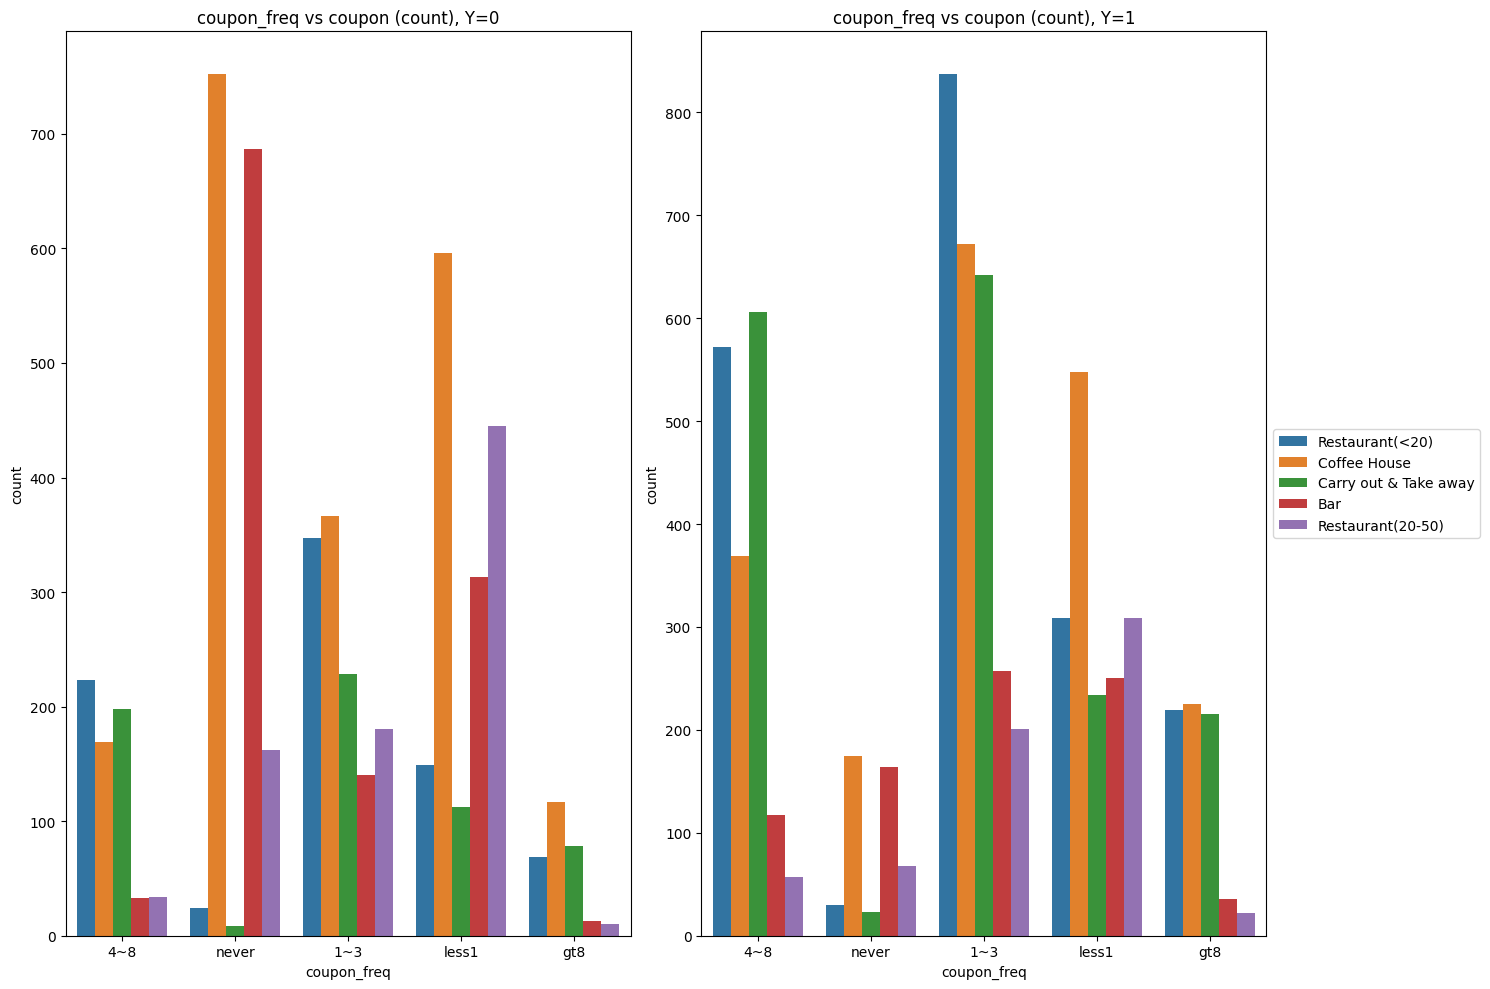

In [ ]:
# Define the order of unique values for each variable
coupon_order = df['coupon'].unique()
coupon_freq_order = df['coupon_freq'].unique()

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot for 'destination' vs 'passenger', Y=0
sns.countplot(x='coupon_freq', hue='coupon', data=df[df['Y'] == 0], ax=axes[0], order=coupon_freq_order, hue_order=coupon_order)
axes[0].set_title('coupon_freq vs coupon (count), Y=0')
axes[0].legend().remove()


# Plot for 'destination' vs 'passenger', Y=1
sns.countplot(x='coupon_freq', hue='coupon', data=df[df['Y'] == 1], ax=axes[1], order=coupon_freq_order, hue_order=coupon_order)
axes[1].set_title('coupon_freq vs coupon (count), Y=1')

# Set legend on the right
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


fig.tight_layout()
plt.show()

Most users in this data have visited more than one time Restaurant(<$20) and Carry Away services and also they have the highest coupon acceptance ratio.<br>
Users who visited Coffee House 1to3 times and 4to8 times have also higher coupon acceptance ratio.<br>
Most users visited an expensive Restaurant only once and users who visited an expensive Restaurant greater than 4 times have the highest coupon acceptance ratio for an expensive Restaurant.<br>
Most users in this data never visit a Bar and most of them reject the bar coupon and users who visited Bar 1to3 times or 4to8 times have a higher coupon acceptance ratio.<br>

In [ ]:
df.drop(['RestaurantLessThan20','CoffeeHouse', 'CarryAway', 'Bar', 'Restaurant20To50'], axis=1, inplace=True)

#### occupation_class

occupation feature has 25 no of distinct values, which creates very sparsity in the data matrix after encoding so we can try to convert it into a new feature called occupation_class.

We will divide them into five categories in the order of acceptance ratio of coupons:
>4: High<br>
>3: Medium_high<br>
>2: medium<br>
>1: Medium_low<br>
>0: Low<br>

In [ ]:
occupation_acceptance_rate = df.groupby("occupation")["Y"].mean()

quintiles = pd.qcut(occupation_acceptance_rate, 5, labels=False)

occupation_class = pd.Series(quintiles, index=occupation_acceptance_rate.index)

df["occupation_class"] = df["occupation"].map(occupation_class)

df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Y,to_Coupon,coupon_freq,occupation_class
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,1,0,4~8,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,never,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,1,1,1~3,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,1,never,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,1,never,1


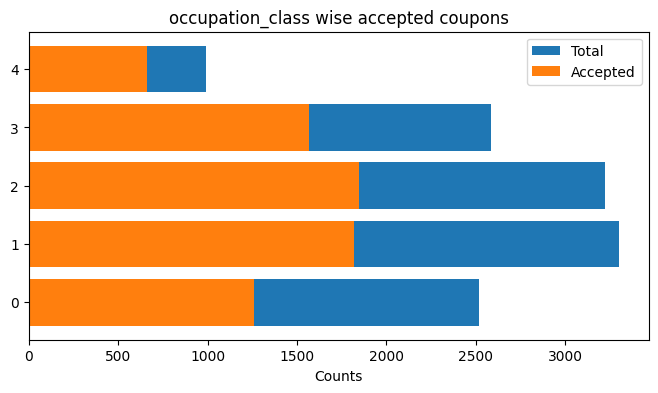

,occupation_class,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
1,1,3300,26.170,1821,1479,55.182,44.818
2,2,3221,25.543,1849,1372,57.405,42.595
3,3,2583,20.484,1566,1017,60.627,39.373
0,0,2517,19.960,1258,1259,49.980,50.020
4,4,989,7.843,663,326,67.037,32.963


In [ ]:
univariate_analysis(df,'occupation_class')

In [ ]:
df.drop(['occupation'], axis=1, inplace=True)

### 4.5-Encoding


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

order = [['Work','Home','No Urgent Place'],
         ['Kid(s)','Alone','Partner','Friend(s)'],
         ['Rainy','Snowy','Sunny'],
         [30,55,80],
         ['7AM','10AM','2PM','6PM','10PM'],
         ['Bar','Restaurant(20-50)','Coffee House','Restaurant(<20)','Carry out & Take away'],
         ['2h','1d'],
         ['Female','Male'],
         ['below21','21','26','31','36','41','46','50plus'],
         ['Widowed','Divorced','Married partner','Unmarried partner','Single'],
         ['Some High School','High School Graduate','Some college - no degree','Associates degree','Bachelors degree','Graduate degree (Masters or Doctorate)'],
         ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More'],
         ['never','less1','1~3','4~8','gt8']]
Ordinal_enc = OrdinalEncoder(categories=order)
columns_to_encode = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'income', 'coupon_freq']
data_to_encode = df[columns_to_encode]
df_Ordinal_encoding = Ordinal_enc.fit_transform(data_to_encode)
df[columns_to_encode] = df_Ordinal_encoding
df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,income,Y,to_Coupon,coupon_freq,occupation_class
0,2.0,1.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,3.0,1,2.0,3.0,1,0,3.0,1
1,2.0,3.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,3.0,1,2.0,3.0,0,0,0.0,1
2,2.0,3.0,2.0,2.0,1.0,4.0,0.0,0.0,1.0,3.0,1,2.0,3.0,1,1,2.0,1
3,2.0,3.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,3.0,1,2.0,3.0,0,1,0.0,1
4,2.0,3.0,2.0,2.0,2.0,2.0,1.0,0.0,1.0,3.0,1,2.0,3.0,0,1,0.0,1


### 4.6-Pre-Modeling Tasks
#### 1-Separating dependent and independent variables

In [ ]:
# separating our independent and dependent variable
X = df.drop(['Y'], axis = 1)
y = df["Y"]

#### 2-Splitting the training data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .20, random_state=0)

#### 3-Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()

## transforming "train_x"
X_train = st_scale.fit_transform(X_train)
## transforming "test_x"
X_test = st_scale.transform(X_test)

# IV-Modelling
***
## 1- LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model on the training data
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

## 2- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier on the training data
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_clf.predict(X_test)

## 3- SVM

In [ ]:
from sklearn.svm import SVC

# Train an SVM classifier on the training data
svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm_clf.predict(X_test)

## 4- K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN classifier on the training data
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_knn = knn_clf.predict(X_test)

## 5- xgboost

In [ ]:
from xgboost import XGBClassifier
# Train an XGBoost classifier on the training data
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_xgb = xgb_clf.predict(X_test)

## 8- Neural Network: Multilayer perceptron

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Define the dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create the DataLoader
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Set the device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



In [ ]:
import torch.optim.lr_scheduler as lr_scheduler

# Define the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1

model = MLP(input_size, hidden_size, output_size).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create the learning rate scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    running_loss = 0.0
    # Update the learning rate for each epoch
    scheduler.step()

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

Epoch 1/100, Loss: 0.6450
Epoch 2/100, Loss: 0.6126
Epoch 3/100, Loss: 0.5998
Epoch 4/100, Loss: 0.5971
Epoch 5/100, Loss: 0.5955
Epoch 6/100, Loss: 0.5940
Epoch 7/100, Loss: 0.5907
Epoch 8/100, Loss: 0.5938
Epoch 9/100, Loss: 0.5892
Epoch 10/100, Loss: 0.5862
Epoch 11/100, Loss: 0.5901
Epoch 12/100, Loss: 0.5844
Epoch 13/100, Loss: 0.5862
Epoch 14/100, Loss: 0.5839
Epoch 15/100, Loss: 0.5830
Epoch 16/100, Loss: 0.5835
Epoch 17/100, Loss: 0.5828
Epoch 18/100, Loss: 0.5794
Epoch 19/100, Loss: 0.5796
Epoch 20/100, Loss: 0.5818
Epoch 21/100, Loss: 0.5798
Epoch 22/100, Loss: 0.5795
Epoch 23/100, Loss: 0.5765
Epoch 24/100, Loss: 0.5786
Epoch 25/100, Loss: 0.5744
Epoch 26/100, Loss: 0.5761
Epoch 27/100, Loss: 0.5792
Epoch 28/100, Loss: 0.5766
Epoch 29/100, Loss: 0.5762
Epoch 30/100, Loss: 0.5691
Epoch 31/100, Loss: 0.5764
Epoch 32/100, Loss: 0.5719
Epoch 33/100, Loss: 0.5742
Epoch 34/100, Loss: 0.5744
Epoch 35/100, Loss: 0.5748
Epoch 36/100, Loss: 0.5738
Epoch 37/100, Loss: 0.5751
Epoch 38/1

# V-Evaluation
***

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_classification(y_pred, y_test):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Calculate precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Calculate recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)

    # Calculate AUC-ROC
    auc_roc = roc_auc_score(y_test, y_pred)
    print("AUC-ROC:", auc_roc)

## 1- LogisticRegression

In [ ]:
evaluate_classification(y_pred, y_test)

Accuracy: 0.7073750991276765
Precision: 0.7319391634980988
Recall: 0.7857142857142857
F1 Score: 0.7578740157480315
AUC-ROC: 0.691811515480717


## 2- Random Forest

In [ ]:
evaluate_classification(y_pred_rf, y_test)

Accuracy: 0.7343378271213322
Precision: 0.7628120893561103
Recall: 0.789795918367347
F1 Score: 0.7760695187165776
AUC-ROC: 0.7233200124156126


## 3- SVM

In [ ]:
evaluate_classification(y_pred_svm, y_test)

Accuracy: 0.710943695479778
Precision: 0.7346421785940469
Recall: 0.7891156462585034
F1 Score: 0.7609052148245327
AUC-ROC: 0.6954133364372365


## 4- K-NN

In [ ]:
evaluate_classification(y_pred_knn, y_test)

Accuracy: 0.6855670103092784
Precision: 0.7234323432343235
Recall: 0.745578231292517
F1 Score: 0.7343383584589614
AUC-ROC: 0.6736446289542433


## 5- xgboost

In [ ]:
evaluate_classification(y_pred_xgb, y_test)

Accuracy: 0.746233148295004
Precision: 0.7726675427069645
Recall: 0.8
F1 Score: 0.786096256684492
AUC-ROC: 0.7355513307984791


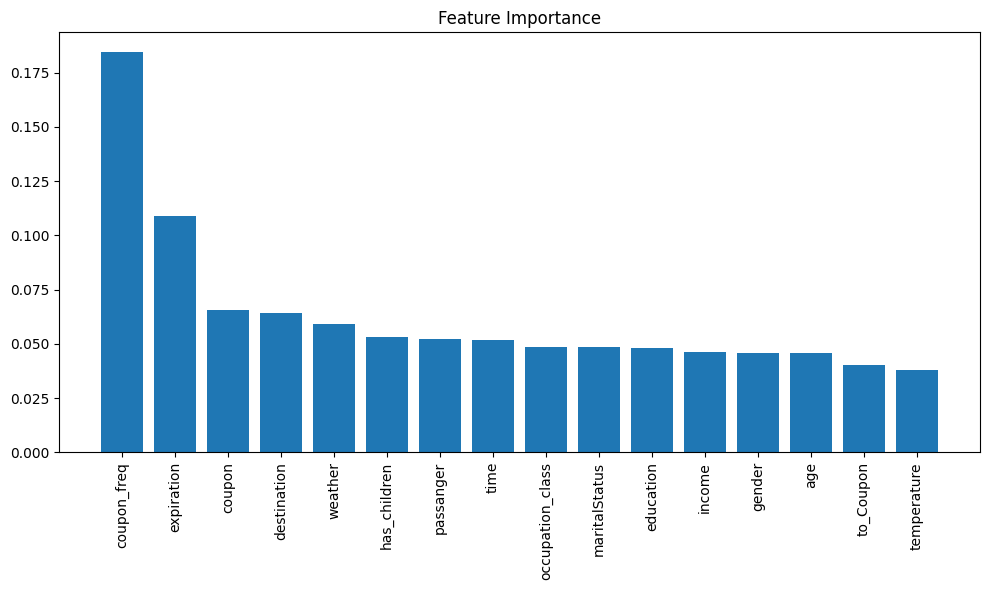

In [ ]:
importances = xgb_clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

## 8- Neural Network: Multilayer perceptron

In [ ]:
# Evaluate the model
with torch.no_grad():
    y_pred_mlp = model(X_test_tensor).round().squeeze().numpy()
evaluate_classification(y_pred_mlp, y_test)

Accuracy: 0.7149088025376685
Precision: 0.7372078332280481
Recall: 0.7938775510204081
F1 Score: 0.7644939403865051
AUC-ROC: 0.6992201443314967


## 9- Results:

### XGBoost had the best performance so let's try fine-tuning it using optuna

## 10- Fine-Tuning

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
import optuna

def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear']),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1),
        'gamma': trial.suggest_loguniform('gamma', 0.001, 1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return accuracy_score(y_test, y_pred)



In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2025-03-07 00:51:18,721] A new study created in memory with name: no-name-bb352cce-61c4-482a-9f76-abd7efbf0a01
[I 2025-03-07 00:51:18,981] Trial 0 finished with value: 0.5931800158604282 and parameters: {'booster': 'gblinear', 'max_depth': 7, 'learning_rate': 0.001010868709178031, 'subsample': 0.5367658851318882, 'colsample_bytree': 0.6621151920156022, 'gamma': 0.0032630209671441145, 'min_child_weight': 1}. Best is trial 0 with value: 0.5931800158604282.
[I 2025-03-07 00:51:20,097] Trial 1 finished with value: 0.6605868358445678 and parameters: {'booster': 'gbtree', 'max_depth': 6, 'learning_rate': 0.0023914956377097465, 'subsample': 0.8597341094527714, 'colsample_bytree': 0.838270285111467, 'gamma': 0.6459854395779044, 'min_child_weight': 6}. Best is trial 1 with value: 0.6605868358445678.
[I 2025-03-07 00:51:24,372] Trial 2 finished with value: 0.6149881046788264 and parameters: {'booster': 'gbtree', 'max_depth': 7, 'learning_rate': 0.002169060907976907, 'subsample': 0.63767804557

In [ ]:
best_params = study.best_params

In [ ]:
final_model = XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6310336276204008, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.6006208450938997,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07350584886806451,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_fm = final_model.predict(X_test)

In [ ]:
evaluate_classification(y_pred_fm, y_test)

Accuracy: 0.7525773195876289
Precision: 0.7667087011349306
Recall: 0.8272108843537415
F1 Score: 0.7958115183246073
AUC-ROC: 0.737749928868886


In [ ]:
evaluate_classification(y_pred_xgb, y_test)

Accuracy: 0.746233148295004
Precision: 0.7726675427069645
Recall: 0.8
F1 Score: 0.786096256684492
AUC-ROC: 0.7355513307984791


### We have achived a 2% increase in performance after fine-tuning the xgboost model

Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.pkl'
pickle.dump(xgb_clf, open(filename, 'wb'))

In [ ]:
# Loading the save model
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok streamlit

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2t0Selvvg3F6PGIMbTKX62b10UH_7i1YxC5hsoFRMUdVMRMuc")

In [ ]:

!streamlit run appp.py &>/dev/null&


In [ ]:

# Get the public URL from ngrok
public_url = ngrok.connect(8501).public_url
print(f"Public URL: {public_url}")


Public URL: https://045e-34-58-31-51.ngrok-free.app
